## Code for vizualisation of Chebyshev Linear Regression task

In [14]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import math
import numpy as np

from function_classes import ChebyshevKernelLinearRegression
from parse import get_x_distribution
from utils import FakeLinspaceDistribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Examples of linear combinations of Chebyshev polynomials with random degree between 0 and 11, with uniformly sampled x

In [15]:
NUM_POLYS = 5
SEQ_LEN = 1000
#x_distribution = torch.distributions.Uniform(-torch.ones((NUM_EXAMPLES, SEQ_LEN, 1)), torch.ones((NUM_EXAMPLES, SEQ_LEN, 1)))
chebyshev_linear_comb_class = ChebyshevKernelLinearRegression(lowest_degree=0, highest_degree=11, #x_distribution=x_distribution)
                                                              x_distribution=FakeLinspaceDistribution(batch_shape=torch.Size((NUM_POLYS, SEQ_LEN, 1))))

x_values, y_values = next(chebyshev_linear_comb_class)

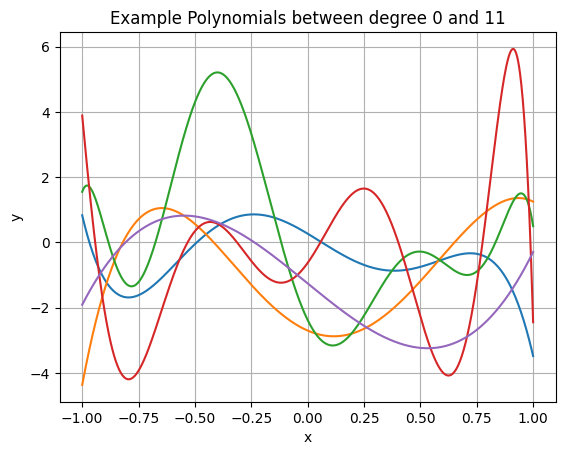

In [16]:
for x, y in zip(x_values, y_values):
    plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example Polynomials of degree between 0 and 11")
plt.grid()
plt.show()

### Analytical Visualisation of distribution of normal random linear combinations of Chebyshev polynomials with random degree between 0 and 11, with uniformly sampled x

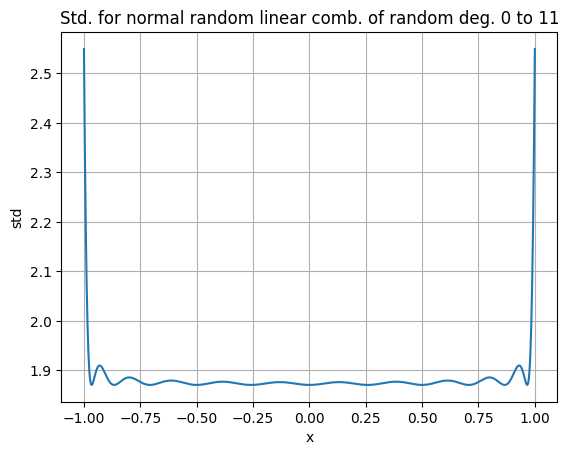

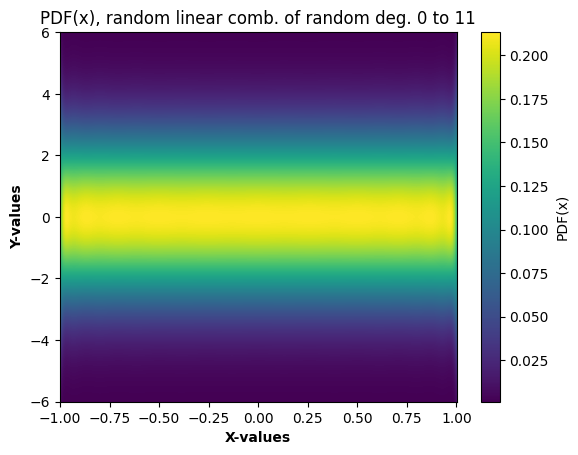

In [17]:
LOWEST_DEGREE = 0
HIGHEST_DEGREE = 11
SIGMA = 1
Y_MAX = 6

SEQ_LEN = 1000

summed_squared_chebyshevs = torch.zeros(SEQ_LEN, 1)
x_values = torch.tensor(0)
for i in range(LOWEST_DEGREE, HIGHEST_DEGREE+1):
    
    cheb_function_class = ChebyshevKernelLinearRegression(lowest_degree=i, highest_degree=i, fixed_linear_coefficients=1, different_degrees=False,
                                                          x_distribution=FakeLinspaceDistribution(batch_shape=torch.Size((1, SEQ_LEN, 1))))
    x_values, y_values = next(cheb_function_class)
    summed_squared_chebyshevs += (HIGHEST_DEGREE - i + 1) * y_values.squeeze(0)**2

variance = summed_squared_chebyshevs * SIGMA**2 / (HIGHEST_DEGREE - LOWEST_DEGREE + 1)

x_values, standard_deviation = x_values.squeeze(0), torch.sqrt(variance)
plt.plot(x_values, standard_deviation)
plt.grid()
plt.title("Std. for normal random linear comb. of random deg. 0 to 11")
plt.xlabel("x")
plt.ylabel("std")
#plt.savefig("std_normal_random_linear_comb.pdf", format='pdf')
plt.show()

def std_variable_normal_dist(y: np.ndarray, mean: np.ndarray | float, std: np.ndarray):
    return 1/(std * math.sqrt(2 * math.pi)) * np.exp(-0.5 * (y - mean)**2 / std**2)

std, y = np.meshgrid(standard_deviation, np.linspace(-Y_MAX, Y_MAX, 1000)) #np.arange(-Y_MAX, Y_MAX, 0.01))
x, _ = np.meshgrid(x_values, np.linspace(-Y_MAX, Y_MAX, 1000)) #np.arange(-Y_MAX, Y_MAX, 0.01))

z = std_variable_normal_dist(y, 0, std)

plt.pcolormesh(x, y, z, shading='nearest')
plt.colorbar(label="PDF(x)")
plt.ylabel("Y-values", fontweight='bold')
plt.xlabel("X-values", fontweight='bold')
plt.title("PDF(x), random linear comb. of random deg. 0 to 11")
#plt.savefig("pdf_normal_random_linear_comb.pdf", format='pdf')
plt.show()

### Numerical Visualization of distribution of normal random linear combinations of Chebyshev polynomials with random degree between 0 and 11, with uniformly sampled x

In [18]:
NUM_EXAMPLES = int(1e6)
SEQ_LEN = 31 #31
#x_distribution = torch.distributions.Uniform(-torch.ones((NUM_EXAMPLES, SEQ_LEN, 1)), torch.ones((NUM_EXAMPLES, SEQ_LEN, 1)))
chebyshev_linear_comb_class = ChebyshevKernelLinearRegression(lowest_degree=0, highest_degree=11, #x_distribution=x_distribution)
                                                              fixed_linear_coefficients=0, different_degrees=True,
                                                              x_distribution=get_x_distribution(batch_size=NUM_EXAMPLES,
                                                                                                seq_len=SEQ_LEN,
                                                                                                x_dim=1,
                                                                                                init_kwargs={'type' : 'uniform'}))

x_values, y_values = next(chebyshev_linear_comb_class)

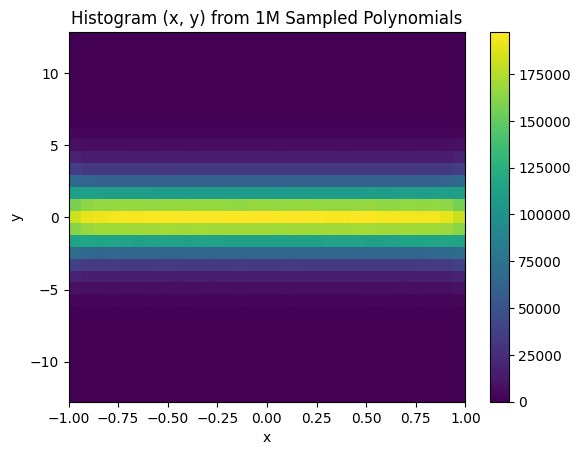

In [19]:
def plot_distribution(x_values: torch.Tensor, y_values: torch.Tensor):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    _, _, _, img = ax.hist2d(x_values.reshape(-1), y_values.reshape(-1), bins=[31,31])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Histogram (x, y) from 1M Sampled Polynomials")
    plt.xlim([-1, 1])
    plt.colorbar(img)
    plt.show()

plot_distribution(x_values, y_values)

### Numerical Visualization of distribution of normal random linear combinations of Chebyshev polynomials with degree 5, with uniformly sampled x

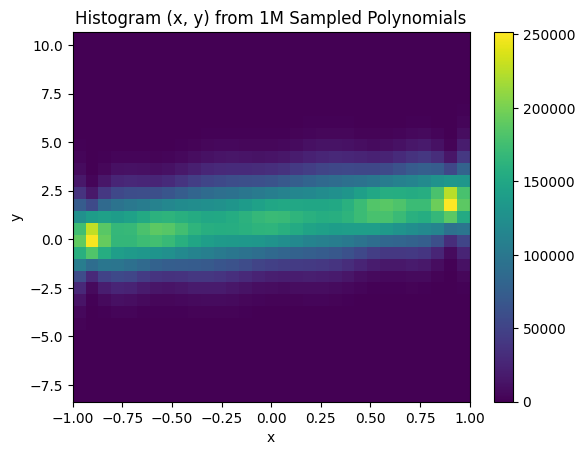

In [20]:
NUM_EXAMPLES = int(1e6)
SEQ_LEN = 31 #31
#x_distribution = torch.distributions.Uniform(-torch.ones((NUM_EXAMPLES, SEQ_LEN, 1)), torch.ones((NUM_EXAMPLES, SEQ_LEN, 1)))
chebyshev_linear_comb_class = ChebyshevKernelLinearRegression(lowest_degree=0, highest_degree=5, 
                                                              fixed_linear_coefficients=2, different_degrees=False,
                                                              x_distribution=get_x_distribution(batch_size=NUM_EXAMPLES,
                                                                                                seq_len=SEQ_LEN,
                                                                                                x_dim=1,
                                                                                                init_kwargs={'type' : 'uniform'}))

x_values, y_values = next(chebyshev_linear_comb_class)

plot_distribution(x_values, y_values)